In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [145]:
df = pd.read_csv("species.csv", sep=",")

In [147]:
# Redundant columns
reduntant_colums = ["YEAR", "PCT_CORAL", "MAX_HARD_RELIEF", "Total_gravity_intercept", "REGION"]
df = df.drop(reduntant_colums, axis = 1)

In [149]:
#Boolean Coluns
# FKNMS 
# DryTortuga
# BNP
# CoralECA

bool_cols = ["FKNMS", "DryTortugas", "BNP", "CoralECA"]

for col in bool_cols:
    df.loc[~df[col].isna(), col] = 1
    df.loc[df[col].isna(), col] = 0

In [151]:
#Keys_Divisions
#CoralECA
df.loc[df.Keys_Divisions.isna(), "Keys_Divisions"] = "CoralECA"

In [153]:
#Not relevant columns

not_relevant_cols = ["no.divers", "Unnamed: 0", "site", "model"]

df = df.drop(not_relevant_cols, axis = 1)

In [155]:
#Dropping connectivity.
# IN the dataset info it says: "...model does not extend to further north reefs and those sites were assigned NAs"

df = df.drop("connectivity", axis = 1)

In [157]:
#Dropping year
df = df.drop("Year", axis = 1)

In [159]:
#Dropping month. Does not seem to influence anything (like for example measurements done during summer or winter)
df = df.drop("Month", axis = 1)

In [161]:
#Dropping impact:
# impact: fishing impact variable derived in previous project; not used in final model
df = df.drop("impact", axis = 1)

In [163]:
#Dropping Random
df = df.drop("Random", axis = 1)

In [165]:
na_series = df.isna().sum()
na_series[na_series > 0]

Coral_cover                 707
Reef_complexity             707
Total_gravity               103
Comm_engagement              89
Comm_reliance                89
Rec_engagement               89
Rec_reliance                 89
Commercial_pounds_landed      1
dtype: int64

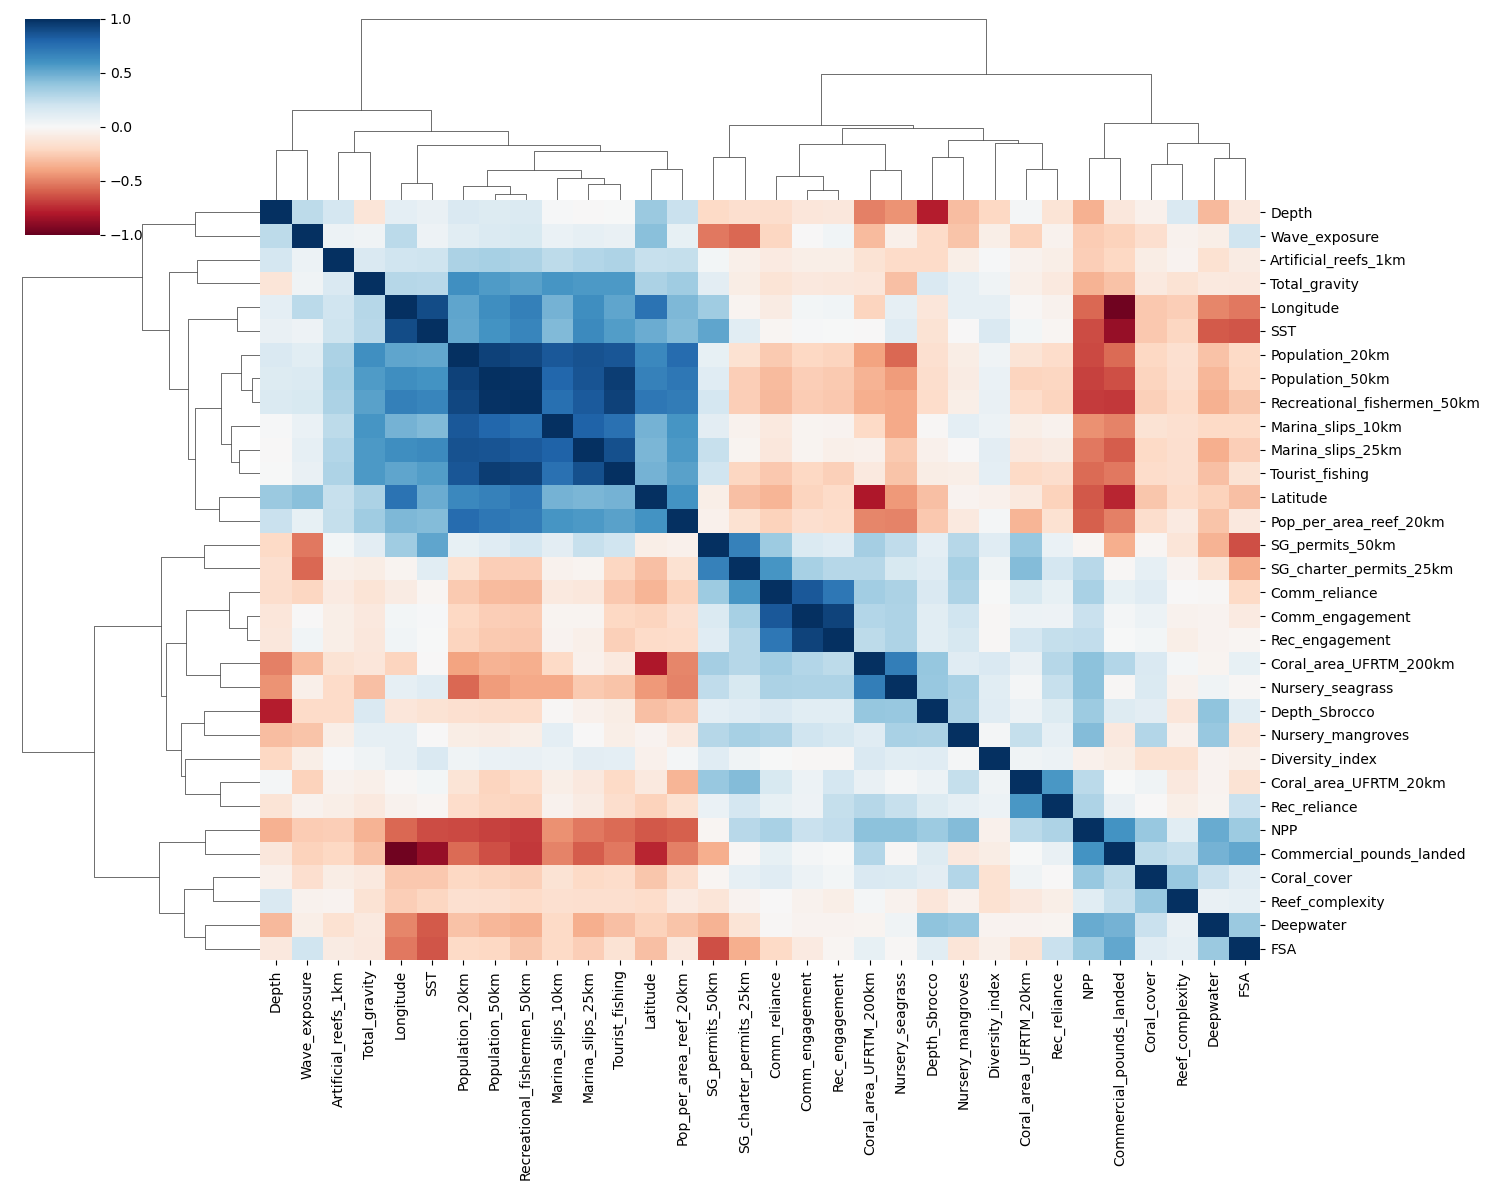

In [167]:
#Step 1

dissimilarity = 1 - abs(df.corr(numeric_only=True))
Z = linkage(squareform(dissimilarity), 'complete')

#Step 2

threshold = 0.5
labels = fcluster(Z, threshold, criterion='distance')

#Step 3

# Keep the indices to sort labels
labels_order = np.argsort(labels)


#Step 4

# Build a new dataframe with the sorted columns
for idx, i in enumerate(df.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(df[i])
    else:
        df_to_append = pd.DataFrame(df[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

        
correlations = df.corr(numeric_only=True)
sb.clustermap(correlations, method="complete", cmap='RdBu', annot=False, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));


In [169]:
corr_df = df.corr(numeric_only = True)

## The difference between the correlation with Coral_cover and Diversity_index

##### -> From this Data Frame we can say, for example, that Comm_reliance is somehow interelated with Coral_cover and not related at all with the Diversity_index, so could be a candidate to be dropped.

##### -> We can use this strategy to eliminate some depencies

In [172]:
coral_higher_than_diversity_corr = corr_df.loc[abs(corr_df.loc["Coral_cover", :]) > abs(corr_df.loc["Diversity_index", :]), ["Coral_cover", "Diversity_index"]]
coral_higher_than_diversity_corr.sort_values(by= "Diversity_index", key = abs)

,Coral_cover,Diversity_index
Comm_reliance,0.121520,0.002786
Rec_engagement,0.027723,-0.008496
Comm_engagement,0.056748,-0.010182
Artificial_reefs_1km,-0.076693,0.011553
Pop_per_area_reef_20km,-0.176252,0.016338
Nursery_mangroves,0.290637,0.022292
Deepwater,0.220841,-0.037910
SG_charter_permits_25km,0.086678,0.039508
Total_gravity,-0.098923,0.042900
Population_20km,-0.205182,0.045993


## The difference between the correlation with Reef_compelxity and Diversity_index

In [186]:
reef_higher_than_diversity_corr = corr_df.loc[abs(corr_df.loc["Reef_complexity", :]) > abs(corr_df.loc["Diversity_index", :]), ["Reef_complexity", "Diversity_index"]]
reef_higher_than_diversity_corr.sort_values(by= "Diversity_index", key = abs)

,Reef_complexity,Diversity_index
Comm_reliance,-0.006978,0.002786
Rec_engagement,-0.063058,-0.008496
Comm_engagement,-0.043321,-0.010182
Artificial_reefs_1km,-0.037598,0.011553
Pop_per_area_reef_20km,-0.086280,0.016338
Nursery_mangroves,-0.052191,0.022292
Deepwater,0.075650,-0.037910
Total_gravity,-0.144548,0.042900
Coral_area_UFRTM_20km,-0.105300,0.044208
Population_20km,-0.157668,0.045993


### All the features that have a higher (absolute) correlation with diversity_index than coral_cover AND reef_complexity

In [184]:
diversity_index_related = []
to_be_analysed = []
for i in corr_df:
    diversity_corr = abs(corr_df.loc["Diversity_index", i])
    coral_cover_corr = abs(corr_df.loc["Coral_cover", i])
    reef_corr = abs(corr_df.loc["Reef_complexity", i])
    if  (diversity_corr > coral_cover_corr) and (diversity_corr > reef_corr) and i != "Diversity_index":
        diversity_index_related.append((i, corr_df.loc["Diversity_index", i]))
    else:
        to_be_analysed.append(i)
        

#Only Depth      
diversity_index_related

        


[('Depth', -0.20773518214334744)]